In [ ]:
import pandas as pd
import numpy as np

import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

import gensim
from gensim import corpora

In [ ]:
df=pd.read_csv('travel_forum_txt.csv',index_col=0)
df

0
0     There are a few factual and helpful websites t...
1     Aynat62 has provided us with "factual and help...
2     Questions and Answers from the World Health Or...
3     Aynat: The Q&As you provided go beyond fact to...
4     To add to the valuable research that Aynat off...
...                                                 ...
5780  It may be nice to do go racing around from one...
5781  Summers in NYC would be unbearable for a Scot....
5782  Re #2. I believe it was Mark Twain who said th...
5783  " I believe it was Mark Twain who said the col...
5784  Yes, I once knew someone who had relocated to ...

[15909 rows x 1 columns]

In [ ]:
df.columns=['msg']
df.reset_index(inplace=True,drop=True)
df=df[df['msg'].apply(lambda s: len(s.split(' ')))>3]#.value_counts(ascending=False).sort_index()#.plot(kind='bar')
df.reset_index(inplace=True,drop=True)


In [ ]:
nlp = spacy.load('en_core_web_sm')


In [ ]:
corpus=' '.join(df['msg'])
corpus

'There are a few factual and helpful websites that visitors can use to get updated information prior to and during their visit to NYC and the US.\n-------------\nThe US Department of Homeland and Security has a notice page about arrival restrictions. Keep checking daily to see what updates and restrictions are made. Also check with your own airline and your own country\'s immigration restrictions during this time:\nhttps://www.dhs.gov/publication/notices-arrival-restrictions-coronavirus\nNYC Health has an information page:\nhttps://www1.nyc.gov/site/doh/health/health-topics/coronavirus.page\nIf you\'re arriving by plane, there are ways to disinfect your space on the plane before takeoff. These tips would also work on trains and buses:\nhttps://www.nytimes.com/article/airplane-flying-coronavirus-spread.html\nThe Centers for Disease Control and Prevention has some tips on preventing the spread of coronavirus:\nhttps://www.cdc.gov/coronavirus/2019-ncov/community/index.html\nWhen you\'re i

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# stop loss words 
stop = set(stopwords.words('english'))

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['clean_msg']=df['msg'].map(clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
lt_lt_words=[ i for i in df['clean_msg'].apply(lambda s: s.split(' '))]

In [ ]:
gensim_dict = corpora.Dictionary(lt_lt_words)


In [ ]:
#Creating document term matrix, demostrating idx and associated frequency of the word
doc_term_matrix = [gensim_dict.doc2bow(i) for i in lt_lt_words]


In [ ]:
from gensim import corpora, models, similarities, downloader
Lda = gensim.models.LdaModel
# Lda = gensim.models.ldamodels.LdaModel
df.head()

msg                                          clean_msg
0  There are a few factual and helpful websites t...  factual helpful website visitor use get update...
1  Aynat62 has provided us with "factual and help...  aynat62 provided u factual helpful website vis...
2  Questions and Answers from the World Health Or...  question answer world health organisation harv...
3  Aynat: The Q&As you provided go beyond fact to...  aynat qas provided go beyond fact influence aw...
4  To add to the valuable research that Aynat off...  add valuable research aynat offered considered...

In [ ]:
ldamodel = Lda(doc_term_matrix, num_topics=15, id2word = gensim_dict, passes=1, random_state=0, eval_every=None)


In [ ]:
tt=ldamodel.print_topics()
topic_words=[re.sub(r'[""\s]','',i.split('*')[1]) for z in range(15) for i in tt[z][1].split('+')[:3] ] #selecting top 3 words from 15 topics

topic_words=list(set(topic_words))+['train','crime']

len(topic_words)
# tt

# t1=['quarantine','2021','travel','vaccine','rule'] ## Quurantine topic
# t2=['res']
tt

[(0,
  '0.019*"quarantine" + 0.014*"state" + 0.013*"edited" + 0.011*"2021" + 0.011*"may" + 0.011*"travel" + 0.010*"people" + 0.010*"vaccine" + 0.010*"pm" + 0.009*"rule"'),
 (1,
  '0.013*"good" + 0.013*"restaurant" + 0.013*"place" + 0.012*"food" + 0.011*"like" + 0.011*"hotel" + 0.011*"area" + 0.008*"great" + 0.007*"also" + 0.007*"bar"'),
 (2,
  '0.019*"hotel" + 0.018*"year" + 0.012*"room" + 0.011*"would" + 0.010*"nyc" + 0.008*"2020" + 0.008*"know" + 0.007*"like" + 0.007*"2" + 0.007*"time"'),
 (3,
  '0.018*"time" + 0.016*"day" + 0.013*"would" + 0.009*"nyc" + 0.008*"test" + 0.008*"back" + 0.008*"see" + 0.007*"going" + 0.007*"go" + 0.007*"get"'),
 (4,
  '0.038*"forum" + 0.035*"post" + 0.027*"tripadvisor" + 0.022*"guideline" + 0.022*"please" + 0.020*"follow" + 0.020*"posting" + 0.018*"staff" + 0.018*"removed" + 0.015*"remove"'),
 (5,
  '0.014*"would" + 0.013*"subway" + 0.011*"get" + 0.010*"train" + 0.010*"one" + 0.010*"take" + 0.009*"people" + 0.008*"station" + 0.008*"time" + 0.007*"want"')

In [ ]:
# tt[:3]
# topic_words
"and"=='and'

True

In [ ]:
# ldamodel.print_topics(num_words=10)

In [ ]:
# df.shape

# Embedder matrix

In [ ]:
t0=[re.sub(r'[""\s]','',i.split('*')[1]) for i in tt[0][1].split('+') ]
t1=[re.sub(r'[""\s]','',i.split('*')[1]) for i in tt[1][1].split('+') ]
t2=[re.sub(r'[""\s]','',i.split('*')[1]) for i in tt[2][1].split('+') ]




In [ ]:
len(xx.columns)

36

In [ ]:
def ct_word_presence(e,lt_wrds,only_indicator=True):

  temp=pd.Series(map(e.count,lt_wrds),
          index=lt_wrds)
  
  if only_indicator:
    temp=(temp>0).astype(int)
  return temp


In [ ]:
xx=df.clean_msg.apply(lambda e:ct_word_presence(e,topic_words))

In [ ]:
xx.head()
# ['vaccine' in xx.columns]

hotel  quarantine  think  state  room  ...  may  tree  city  train  crime
0      0           0      0      0     0  ...    1     0     0      1      0
1      0           0      0      0     0  ...    0     0     0      0      0
2      0           0      0      0     1  ...    0     0     0      0      0
3      0           0      0      0     0  ...    1     0     0      0      0
4      1           0      0      0     0  ...    1     0     0      0      0

[5 rows x 36 columns]

In [ ]:
y0=df.clean_msg.apply(lambda e:ct_word_presence(e,Leisure))
# y1=df.clean_msg.apply(lambda e:ct_word_presence(e,t1))
# y2=df.clean_msg.apply(lambda e:ct_word_presence(e,t2))

# y1.head()

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model=Sequential()

model.add(Dense(10,input_dim=xx.shape[1],activation='relu'))
model.add(Dense(y0.shape[1],activation='softmax'))##22*10*1

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(xx,y0,epochs=100, batch_size=10, verbose=0)


# def gen_embedder_matrix(xx,y0):
#   model=Sequential()

#   model.add(Dense(3,input_dim=xx.shape[1],activation='relu'))
#   model.add(Dense(y0.shape[1],activation='softmax'))##22*10*1

#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#   model.fit(xx,y0,epochs=100, batch_size=10, verbose=0)
#   return pd.DataFrame(model.layers[0].get_weights()[0],
#               index=xx.columns)

# def gen_cosine_matrix(df_wt_0):
#   temp_mag=df_wt_0.apply(lambda e: pow(sum(pow(e,2)),1/2),axis=1)

#   temp_lt=list(sorted(df_wt_0.index))

#   df_cos=pd.DataFrame(index=temp_lt,columns=temp_lt)

#   for i in range(len(temp_lt)):
#     pivot=temp_lt[i]
#     pair_lt=temp_lt[i:]


#     for j in pair_lt:
#       num=sum(df_wt_0.loc[pivot,:]*df_wt_0.loc[j,:])
#       den=temp_mag[pivot]*temp_mag[j]

#       df_cos.loc[pivot,j]=num/den
#       df_cos.loc[j,pivot]=num/den

#   return df_cos


In [ ]:
df_wt_0=pd.DataFrame(model.layers[0].get_weights()[0],
             index=xx.columns)

# df_wt_0.mean(axis=1)#predict topic 1-- quarantile related
df_wt_0.to_csv('emb_matrix_leisure.csv')


In [ ]:
df_wt_0=pd.read_csv('emb_matrix_t0.csv',index_col=0)
df_wt_0

0          1           2  ...           7          8          9
hotel        25.040937  24.902494    1.927210  ...    1.776500  25.165281  24.843939
quarantine  -42.762203 -45.832640   41.601856  ...   40.828020 -44.106840 -40.397003
think         1.766401   0.620549   14.562577  ...   14.557635   1.539138   2.252869
state       -61.709515 -66.011110   67.333046  ...   68.150130 -61.218246 -56.714382
room         13.458117  13.006584    5.263369  ...    5.361276  13.609292  13.325089
tripadvisor -17.846083 -21.184000   44.721450  ...   44.487060 -17.772842 -17.049822
thank        68.201330  68.798070   -7.464392  ...   -7.627086  68.500175  67.437675
park         15.139602  14.827292    4.897679  ...    4.811486  15.243789  15.294218
edited      -99.162980 -82.347100  110.458270  ...  110.701440 -99.305840 -99.004820
subway        9.893906   9.716912    4.002611  ...    3.913626  10.227045  10.110526
one          18.517220  17.682383   11.843814  ...   11.675157  18.550589  18.860168
restaurant    7.480004   6.739644    7.566364  ...    7.599445   7.314604   7.350722
mask        -12.196290 -13.392448   16.454031  ...   16.637863 -12.322451 -11.623907
new           7.383907   6.380634   14.791689  ...   14.718836   7.250331   8.044874
day           9.507808   8.705171   11.554317  ...   11.519895   9.634227   9.897853
thanks       52.467987  53.194570   -4.048402  ...   -3.888182  52.773205  52.157420
period       -4.848314  -7.947453   35.826090  ...   35.761715  -5.411661  -4.314046
never         8.059130   7.633491    5.159028  ...    5.054948   8.060555   8.107925
forum       -22.657465 -26.524609   47.687107  ...   47.710136 -22.941647 -22.165684
airport       1.328379   0.489949    9.859467  ...    9.726882   1.152902   1.479592
walk          7.498005   6.819563    9.745952  ...    9.664893   7.442322   7.895354
would        17.890650  17.141544   10.050129  ...    9.761167  18.054218  18.090836
good         18.486805  18.176266    3.974281  ...    3.894874  18.607891  18.537605
year         12.799150  12.308993    5.799944  ...    5.488453  12.749865  12.738831
central      -0.038862  -0.632023    8.284073  ...    8.285624   0.104873   0.336509
time         11.439335  10.230796   17.177025  ...   16.950958  11.300299  12.099806
people      -70.930695 -78.538300   82.443500  ...   81.954040 -71.738890 -72.198300
post        -14.762699 -17.805058   42.477460  ...   42.723360 -14.867907 -13.112694
car          13.419302  12.943105    7.545254  ...    7.578368  13.635863  13.506250
place        10.822403  10.032379   10.141984  ...    9.954793  10.965000  10.937503
get          16.473505  15.702414   10.407805  ...   10.086327  16.562088  16.663725
may         -82.235380 -82.642715   98.859215  ...   99.672120 -82.896000 -83.624980
tree          9.403260   8.966954    6.834397  ...    6.767874   9.842085   9.465622
city          7.372251   6.702652   11.566047  ...   11.529860   7.555285   7.994195
train        10.380397  10.078585    3.561742  ...    3.323265  10.357611  10.350940
crime        -1.584866  -2.030485    6.958188  ...    7.216499  -1.312584  -1.305204

[36 rows x 10 columns]

In [ ]:
# model.layers[0].get_weights()[1].shape

temp_mag=df_wt_0.apply(lambda e: pow(sum(pow(e,2)),1/2),axis=1)

temp_lt=list(sorted(df_wt_0.index))

df_cos=pd.DataFrame(index=temp_lt,columns=temp_lt)

for i in range(len(temp_lt)):
  pivot=temp_lt[i]
  pair_lt=temp_lt[i:]


  for j in pair_lt:
    num=sum(df_wt_0.loc[pivot,:]*df_wt_0.loc[j,:])
    den=temp_mag[pivot]*temp_mag[j]

    df_cos.loc[pivot,j]=num/den
    df_cos.loc[j,pivot]=num/den

import matplotlib.pyplot as plt
import seaborn as sns 

# plt.figure(figsize=(20,8))
# sns.heatmap(df_cos.fillna(1),annot=True)

In [ ]:
df_cos.columns#.shape

Index(['airport', 'car', 'central', 'city', 'crime', 'day', 'edited', 'forum',
       'get', 'good', 'hotel', 'mask', 'may', 'never', 'new', 'one', 'park',
       'people', 'period', 'place', 'post', 'quarantine', 'restaurant', 'room',
       'state', 'subway', 'thank', 'thanks', 'think', 'time', 'train', 'tree',
       'tripadvisor', 'walk', 'would', 'year'],
      dtype='object')

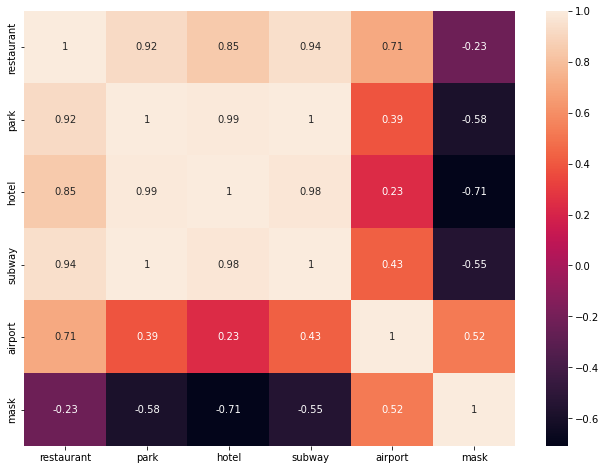

In [ ]:
#quarantien-t0
tbu=['restaurant','park','hotel','subway','airport','mask']
plt.figure(figsize=(11,8))
sns.heatmap(df_cos.loc[tbu,tbu].fillna(0),annot=True)##hospital mei jaha mask bik raha hai waha subway ka add mtt do


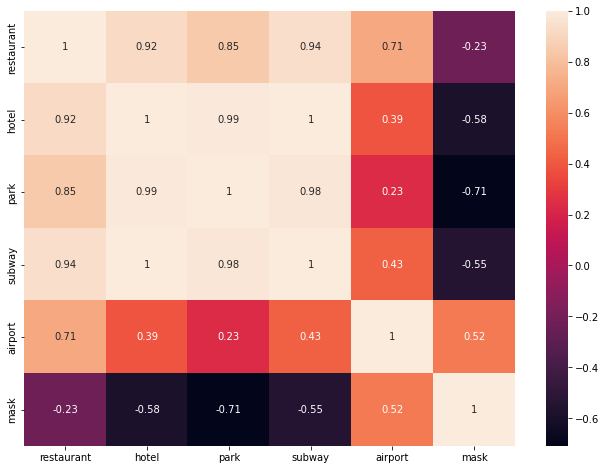

In [ ]:
#quarantien-t0
tbu=['restaurant','park','hotel','subway','airport','mask']
plt.figure(figsize=(11,8))


temp=df_cos.loc[tbu,tbu].fillna(0)
# sns.heatmap(df_cos.loc[tbu,tbu].fillna(0),annot=True)##hospital mei jaha mask bik raha hai waha subway ka add mtt do
temp.columns=['restaurant','hotel','park','subway','airport','mask']
temp.index=['restaurant','hotel','park','subway','airport','mask']
sns.heatmap(temp,annot=True)##hospital mei jaha mask bik raha hai waha subway ka add mtt do


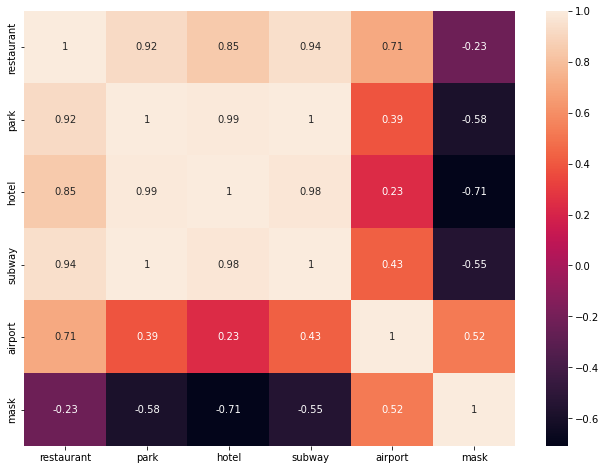

In [ ]:
#quarantien-t0
tbu=['restaurant','park','hotel','subway','airport','mask']
plt.figure(figsize=(11,8))
sns.heatmap(df_cos.loc[tbu,tbu].fillna(0),annot=True)##hospital mei jaha mask bik raha hai waha subway ka add mtt do


In [ ]:
tbu=['restaurant','park','walk','subway','hotel','train','crime','airport','mask']

df_cos.loc[tbu,tbu]#leisure

restaurant         park        walk  ...     crime   airport      mask
restaurant          1     0.111748    0.106205  ...  0.270766  0.429742   0.47077
park         0.111748            1    0.999959  ... -0.925819 -0.849227 -0.823865
walk         0.106205     0.999959           1  ... -0.927796 -0.852109 -0.826979
subway       0.523387     0.905164    0.902768  ... -0.678181 -0.544396 -0.505243
hotel        0.969501     0.351223    0.345983  ...  0.026975  0.195922  0.240681
train        0.993715  0.000817547 -0.00476646  ...  0.375652   0.52719   0.56553
crime        0.270766    -0.925819   -0.927796  ...         1  0.985169  0.976364
airport      0.429742    -0.849227   -0.852109  ...  0.985169         1  0.998822
mask          0.47077    -0.823865   -0.826979  ...  0.976364  0.998822         1

[9 rows x 9 columns]

In [ ]:
tbu=['restaurant','park','walk','subway','hotel','train','crime','airport','mask']
#hospital mei jaha mask bik raha hai waha subway ka add mtt do

df_cos.loc[tbu,tbu]#quarantine

restaurant      park      walk  ...      crime   airport      mask
restaurant          1  0.923815  0.994417  ...   0.285994  0.711483 -0.229427
park         0.923815         1  0.879188  ...  -0.101853   0.38846 -0.584367
walk         0.994417  0.879188         1  ...   0.383809  0.780458 -0.127224
subway       0.940423  0.998901  0.900121  ... -0.0559475  0.430452 -0.546384
hotel         0.84954  0.986734  0.790245  ...  -0.261902   0.23386 -0.708298
train        0.924784  0.999934  0.880289  ... -0.0997477  0.390782 -0.582388
crime        0.285994 -0.101853  0.383809  ...          1  0.875795  0.866221
airport      0.711483   0.38846  0.780458  ...   0.875795         1  0.520605
mask        -0.229427 -0.584367 -0.127224  ...   0.866221  0.520605         1

[9 rows x 9 columns]

In [ ]:
tbu=['restaurant','park','walk','subway','hotel','train','crime','airport','mask']
tbu=['restaurant','park','hotel','train','airport','mask']

df_cos.loc[tbu,tbu]#tv pe subway ke add ke baad mask ka add deo#restraunt

restaurant         park     hotel        train   airport      mask
restaurant          1     0.111748  0.969501     0.993715  0.429742   0.47077
park         0.111748            1  0.351223  0.000817547 -0.849227 -0.823865
hotel        0.969501     0.351223         1     0.936377  0.195922  0.240681
train        0.993715  0.000817547  0.936377            1   0.52719   0.56553
airport      0.429742    -0.849227  0.195922      0.52719         1  0.998822
mask          0.47077    -0.823865  0.240681      0.56553  0.998822         1

In [ ]:
tt

[(0,
  '0.019*"quarantine" + 0.014*"state" + 0.013*"edited" + 0.011*"2021" + 0.011*"may" + 0.011*"travel" + 0.010*"people" + 0.010*"vaccine" + 0.010*"pm" + 0.009*"rule"'),
 (1,
  '0.013*"good" + 0.013*"restaurant" + 0.013*"place" + 0.012*"food" + 0.011*"like" + 0.011*"hotel" + 0.011*"area" + 0.008*"great" + 0.007*"also" + 0.007*"bar"'),
 (2,
  '0.019*"hotel" + 0.018*"year" + 0.012*"room" + 0.011*"would" + 0.010*"nyc" + 0.008*"2020" + 0.008*"know" + 0.007*"like" + 0.007*"2" + 0.007*"time"'),
 (3,
  '0.018*"time" + 0.016*"day" + 0.013*"would" + 0.009*"nyc" + 0.008*"test" + 0.008*"back" + 0.008*"see" + 0.007*"going" + 0.007*"go" + 0.007*"get"'),
 (4,
  '0.038*"forum" + 0.035*"post" + 0.027*"tripadvisor" + 0.022*"guideline" + 0.022*"please" + 0.020*"follow" + 0.020*"posting" + 0.018*"staff" + 0.018*"removed" + 0.015*"remove"'),
 (5,
  '0.014*"would" + 0.013*"subway" + 0.011*"get" + 0.010*"train" + 0.010*"one" + 0.010*"take" + 0.009*"people" + 0.008*"station" + 0.008*"time" + 0.007*"want"')

In [ ]:
df_cos.index

Index(['2021', 'ago', 'airport', 'author', 'car', 'central', 'city', 'crime',
       'day', 'edited', 'flight', 'food', 'forum', 'get', 'go', 'good',
       'guideline', 'hotel', 'inn', 'jfk', 'like', 'mask', 'may', 'never',
       'new', 'nyc', 'one', 'park', 'people', 'period', 'place', 'please',
       'post', 'quarantine', 'read', 'restaurant', 'room', 'see', 'state',
       'subway', 'test', 'thank', 'thanks', 'thing', 'think', 'time', 'train',
       'tree', 'tripadvisor', 'walk', 'would', 'year', 'york', 'you'],
      dtype='object')

['quarantine',
 'state',
 'edited',
 '2021',
 'may',
 'travel',
 'people',
 'vaccine',
 'pm',
 'rule']

## TOPICS Interpreted

In [ ]:
Quarantine = ['quarantine', 'travel', 'vaccine', 'rule', 'may', '2021', 'mask']
Accommodation= ['restaurant', 'food', 'hotel', 'inn', 'great', 'bar','room']
Leisure=['park', 'walk', 'central', 'time', 'street', 'brooklyn', 'jazz', 'date']
Crime=['crime', 'people', 'homeless', 'like']
Travel=['hotel', 'car', 'flight', 'airport', 'jfk','parking','subway', 'train', 'people', 'station', 'time'] 
y_words=list(set(Accommodation+Leisure+Travel))
len(y_words)

24

In [ ]:
# temp_words=[i for i in topic_words if i not in Quarantine]
# xx=df.clean_msg.apply(lambda e:ct_word_presence(e,topic_words))
y_leisure=df.clean_msg.apply(lambda e:ct_word_presence(e,Leisure))


In [ ]:
y_quarantine=df.clean_msg.apply(lambda e:ct_word_presence(e,Quarantine))
y_acco=df.clean_msg.apply(lambda e:ct_word_presence(e,Accommodation))
y_leisure=df.clean_msg.apply(lambda e:ct_word_presence(e,Leisure))
y_crime=df.clean_msg.apply(lambda e:ct_word_presence(e,Quarantine))
y_travel=df.clean_msg.apply(lambda e:ct_word_presence(e,Quarantine))

KeyboardInterrupt: ignored

In [ ]:
emb_quarantine=gen_embedder_matrix(xx,y_quarantine)

KeyboardInterrupt: ignored

In [ ]:
# df_wt_0.to_csv('emb_quarantine.csv')
df_wt_0.to_csv('emb_matrix_t0.csv')

In [ ]:
df_cos=gen_cosine_matrix(emb_quarantine)

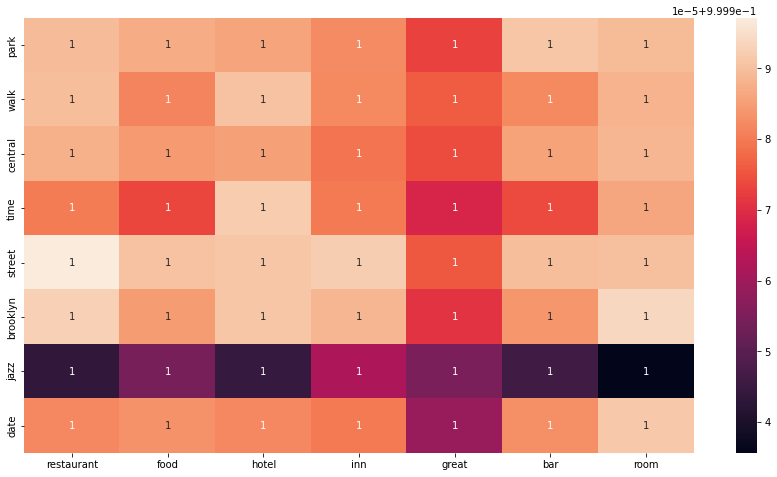

In [ ]:
plt.figure(figsize=(15,8))
df_cos1=df_cos.copy()
sns.heatmap(df_cos.loc[Leisure,Accommodation].fillna(0),annot=True)

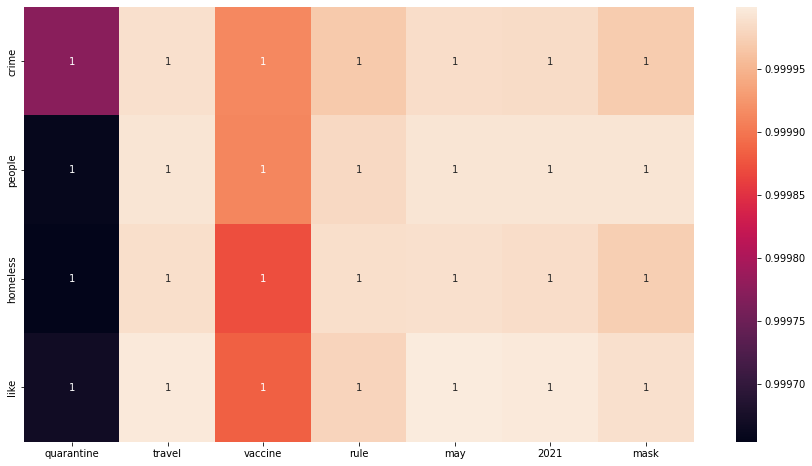

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_cos.loc[Crime,Quarantine].fillna(0),annot=True)

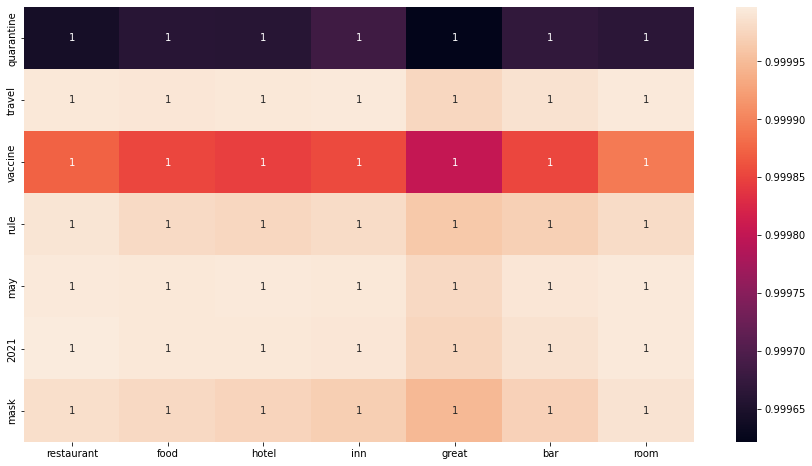

In [ ]:
plt.figure(figsize=(15,8))
# df_cos1=df_cos.copy()
sns.heatmap(df_cos.loc[Quarantine,Accommodation].fillna(0),annot=True)

In [ ]:
df_wt_0

0           1  ...           8           9
hotel        112.683556  111.601074  ...  112.200340  112.970032
back          73.989616   73.956497  ...   73.679420   73.847527
state         58.229115   58.361202  ...   57.914783   58.016140
food          74.669937   74.936501  ...   74.878922   74.878212
tripadvisor   25.082851   24.595154  ...   24.809788   24.882109
...                 ...         ...  ...         ...         ...
car           94.364838   94.860001  ...   93.321663   94.303215
2021          73.172173   72.880196  ...   72.551613   72.836884
guideline    -32.219963  -32.172943  ...  -31.713720  -32.086636
may           89.777893   89.483131  ...   89.449760   89.485825
crime         19.643656   19.298014  ...   19.334835   19.262293

[92 rows x 10 columns]